In [ ]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import os
os.listdir()


['.config', '1730285881-Airbnb_Open_Data(in).csv', 'sample_data']

In [ ]:
df = pd.read_csv('1730285881-Airbnb_Open_Data(in).csv', low_memory=False)


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18448 entries, 0 to 18447
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18448 non-null  int64  
 1   NAME                            18372 non-null  object 
 2   host id                         18448 non-null  int64  
 3   host_identity_verified          18353 non-null  object 
 4   host name                       18409 non-null  object 
 5   neighbourhood group             18421 non-null  object 
 6   neighbourhood                   18432 non-null  object 
 7   lat                             18440 non-null  float64
 8   long                            18440 non-null  float64
 9   country                         18397 non-null  object 
 10  country code                    18368 non-null  object 
 11  instant_bookable                18368 non-null  object 
 12  cancellation_policy             

In [ ]:
df.duplicated().value_counts()

,count
False,18448


In [ ]:
# Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
print(df.columns)


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


In [ ]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop 'house_rules' and 'license' columns if they exist
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# --- Clean price and service fee columns safely ---
# Ensure columns exist before cleaning
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
if 'service fee' in df.columns:
    df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Rename columns AFTER cleaning
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# --- Handle missing values safely ---
# Drop rows only if key columns are missing
df.dropna(subset=['price_$', 'service_fee_$', 'neighbourhood group'], inplace=True)

# --- Convert data types carefully ---
# Convert numeric columns with error handling
df['price_$'] = pd.to_numeric(df['price_$'], errors='coerce')
df['service_fee_$'] = pd.to_numeric(df['service_fee_$'], errors='coerce')

# Convert IDs to string
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)

# Convert 'last review' to datetime safely
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Convert 'Construction year' safely
df['Construction year'] = pd.to_numeric(df['Construction year'], errors='coerce').astype('Int64')

# --- Fix spelling issues ---
df.loc[df['neighbourhood group'].str.lower() == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# --- Remove outliers safely ---
if 'availability 365' in df.columns:
    df = df[df['availability 365'] <= 500]

# --- Final cleaning ---
# Drop any rows that still have missing essential values
df.dropna(subset=['price_$', 'service_fee_$'], inplace=True)

print("✅ Data cleaned successfully!")
print(f"Remaining rows: {len(df)}")


✅ Data cleaned successfully!
Remaining rows: 101106


In [ ]:
df.duplicated().value_counts()

,count
False,101106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18448 entries, 0 to 18447
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18448 non-null  int64  
 1   NAME                            18372 non-null  object 
 2   host id                         18448 non-null  int64  
 3   host_identity_verified          18353 non-null  object 
 4   host name                       18409 non-null  object 
 5   neighbourhood group             18421 non-null  object 
 6   neighbourhood                   18432 non-null  object 
 7   lat                             18440 non-null  float64
 8   long                            18440 non-null  float64
 9   country                         18397 non-null  object 
 10  country code                    18368 non-null  object 
 11  instant_bookable                18368 non-null  object 
 12  cancellation_policy             

In [ ]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.844800e+04,1.844800e+04,18440.000000,18440.000000,18301.000000,18287.000000,18427.000000,15261.000000,18344.000000,18387.000000,18289.000000
mean,6.095475e+06,4.908037e+10,40.729954,-73.957934,2012.478553,8.013452,36.634232,0.881754,2.994494,3.740632,198.915796
std,2.941342e+06,2.849904e+10,0.052497,0.037308,5.770506,37.002979,60.874291,1.221490,1.418610,13.102160,129.815042
min,1.001254e+06,1.303496e+08,40.499790,-74.242850,2003.000000,-12.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,3.548406e+06,2.434041e+10,40.690053,-73.983470,2007.000000,1.000000,1.000000,0.090000,2.000000,1.000000,84.000000
50%,6.095475e+06,4.876986e+10,40.723905,-73.958620,2012.000000,3.000000,9.000000,0.320000,3.000000,1.000000,199.000000
75%,8.642545e+06,7.381045e+10,40.764325,-73.942370,2017.000000,5.000000,45.000000,1.210000,4.000000,2.000000,312.000000
max,1.118961e+07,9.873673e+10,40.908040,-73.712990,2022.000000,3455.000000,629.000000,14.580000,5.000000,121.000000,426.000000


In [ ]:
#what are the different pperty types in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,10380
Private room,7790
Shared room,277


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

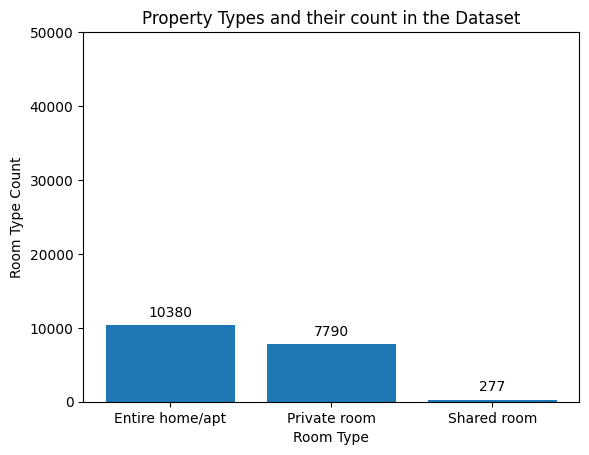

In [ ]:
#room  type count plotted on a barchart

room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"])
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4)
plt.ylim(0, 50000)
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')


In [ ]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group



,count
neighbourhood group,
Brooklyn,1


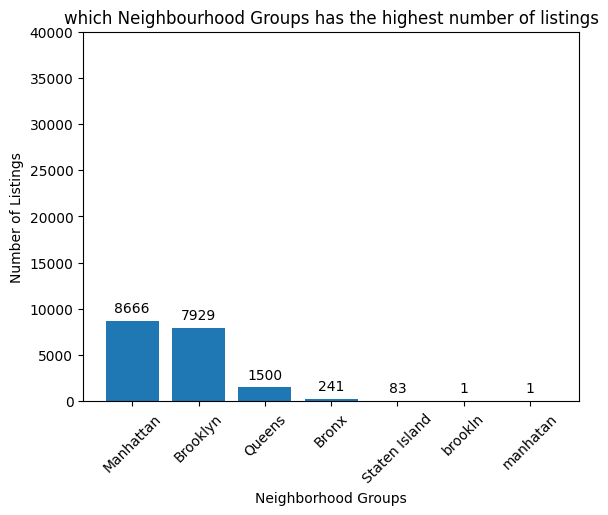

In [ ]:
# which neighbourhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4);
plt.ylim(0, 40000);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('which Neighbourhood Groups has the highest number of listings');


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


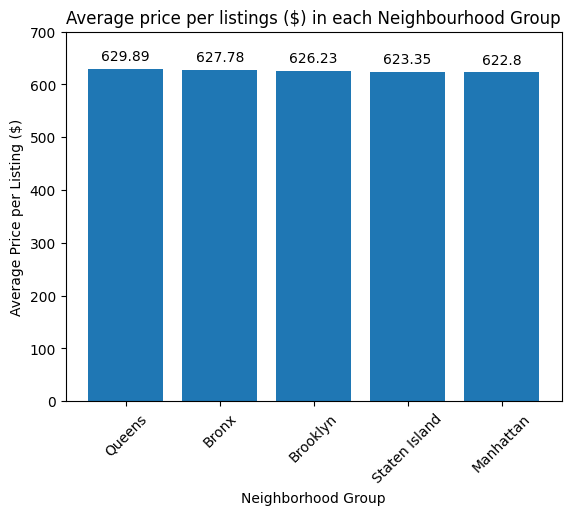

In [ ]:
# Which neighborhood groups have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()

avg_price_bar = plt.bar(avg_price.index, avg_price['price_$'])
plt.bar_label(avg_price_bar, labels=round(avg_price['price_$'], 2), label_type='edge', padding=4)

plt.ylim([0,700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.title('Average Price per Listings ($) in each Neighbourhood Group')
plt.xticks(rotation=45)
plt.title("Average price per listings ($) in each Neighbourhood Group");


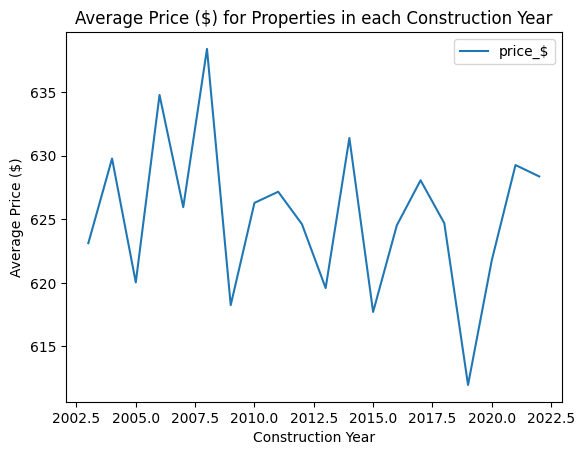

In [ ]:
# Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');


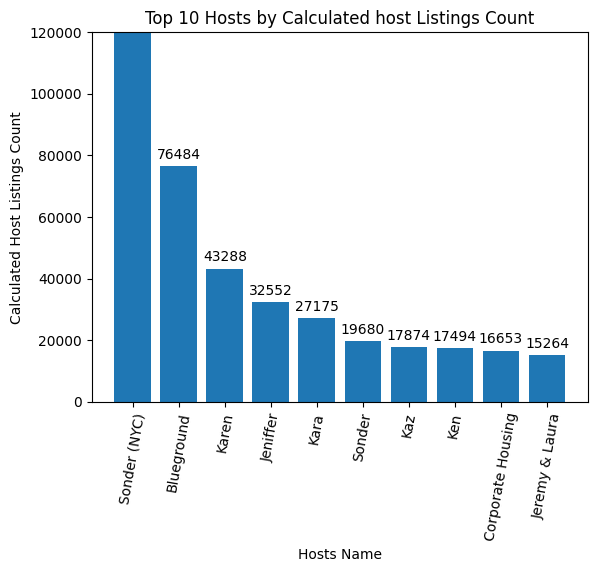

In [ ]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');


In [ ]:
#Are hosts with verified identities more likely to recieve positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.285094
unconfirmed,3.270730


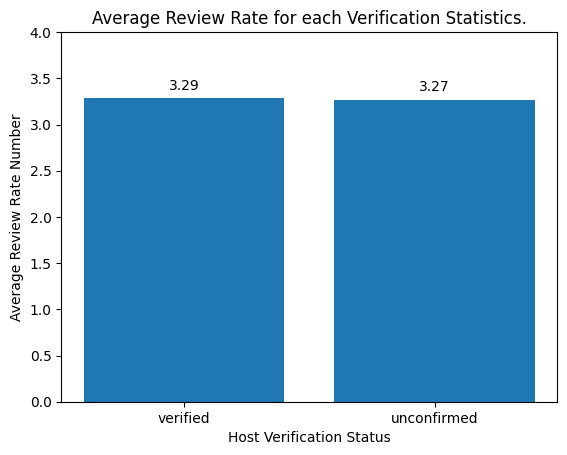

In [ ]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"])
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);
plt.ylim([0, 4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');


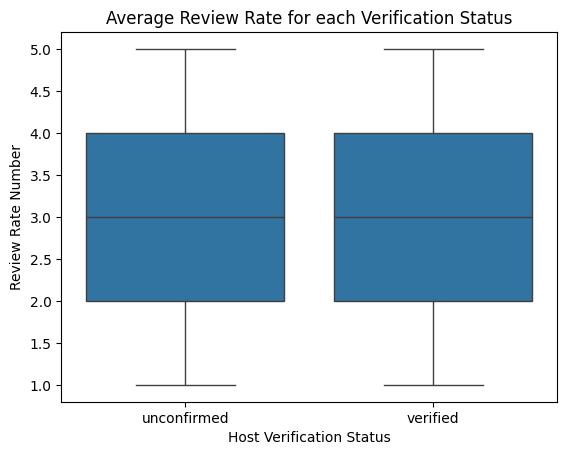

In [ ]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');


In [ ]:
#Is there a correlation betwen the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999908772287328)

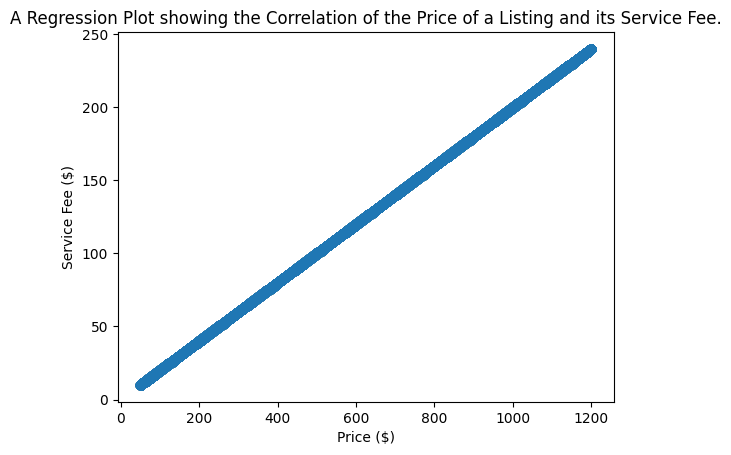

In [ ]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');


In [ ]:
#What is the average review rate number (e.g. stars) for listings, and  does it vary based on the neighbourhood group and room type?
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346614
                    Private room               3.322454
                    Shared room                3.238938
Brooklyn            Entire home/apt            3.249457
                    Hotel room                 3.857143
                    Private room               3.262738
                    Shared room                3.332094
Manhattan           Entire home/apt            3.275511
                    Hotel room                 3.500000
                    Private room               3.276288
                    Shared room                3.261851
Queens              Entire home/apt            3.346898
                    Hotel room                 3.750000
                    Private room               3.313388
                    Shared room                3.370056
Staten Island       Entire home/apt            3.328358
                    Private room               3.476821
                    Shared room                3.533333

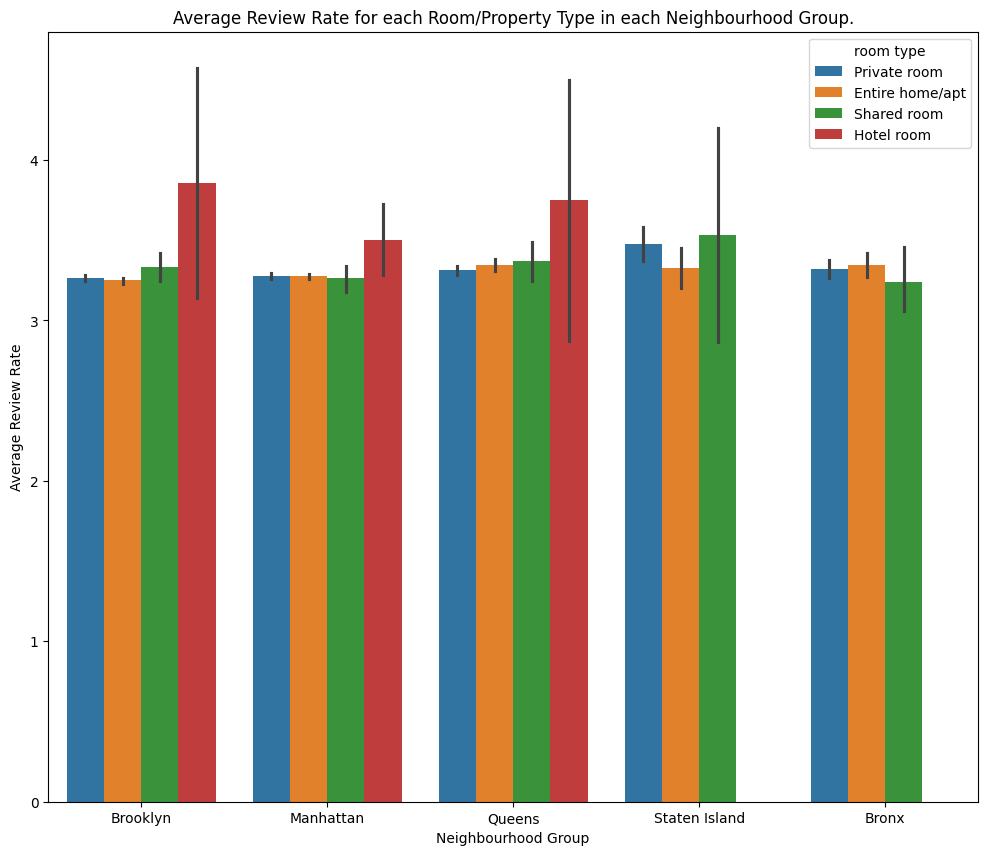

In [ ]:
plt.figure(figsize = (12,10));
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');


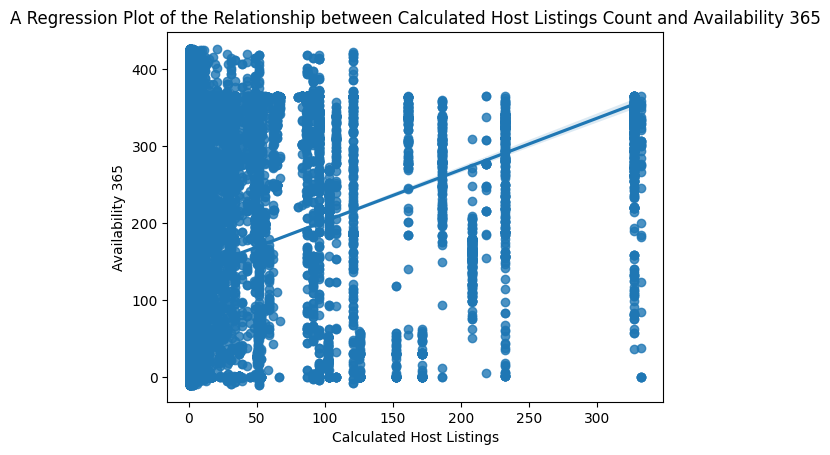

In [ ]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');


In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.16021661959249653)